# Assignment 2: EDA on Haberman Cancer Dataset
Name: Devendra Bharti <br/>
Email: kumardev0614@gmail.com

# Import Dataset

In [ ]:
#Haberman's survival dataset contains cases from a study that was conducted 
#between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients 
#who had undergone surgery for breast cancer.

#Attribute Information:
#Age of patient at the time of operation (numerical)
#Patient's year of operation (year - 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hb = pd.read_csv('haberman.csv')

# Number of points and features.

In [8]:
hb

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
hb.shape

(306, 4)

In [6]:
hb.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Observations:
We have data of 306 patients.
<br/>There is no single missing value in dataset.
<br/>This data is recorded between 1958 to 1970.
<br/>So any value in year column from 58 to 70 means 1958 to 1970. EX 64 = 1964, 59 = 1959.

# Number of classes, data-points per class.

In [36]:
hb.status.value_counts()

1    225
2     81
Name: status, dtype: int64

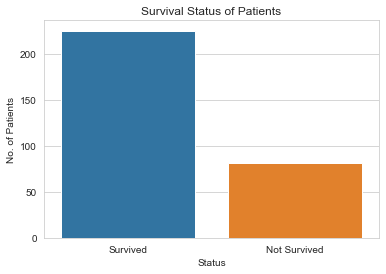

In [63]:
sns.set_style('whitegrid')

ax = sns.countplot(x='status', y=None, data=hb)

plt.title("Survival Status of Patients")
plt.xlabel('Status') 
plt.ylabel('No. of Patients')

ax.set(xticklabels=['Survived', 'Not Survived']) 
# ref: https://stackoverflow.com/questions/54167457/set-ticks-in-seaborn-countplot

plt.show()

#### Observations:
There is only one categorical variable "status" in our dataset.
1 means "Survied"
2 means "Not Survived"

So out of 306 patients, 225 survived 5 years or longer and 81 died within 5 years.<br/>
This dataset is not a balanced dataset.
Because there is a considerable difference between survived patients and non survived patients.

# Our Objective
**We have to find That/Those feature(s) which can help us to classify whether a patient will survive or not.**

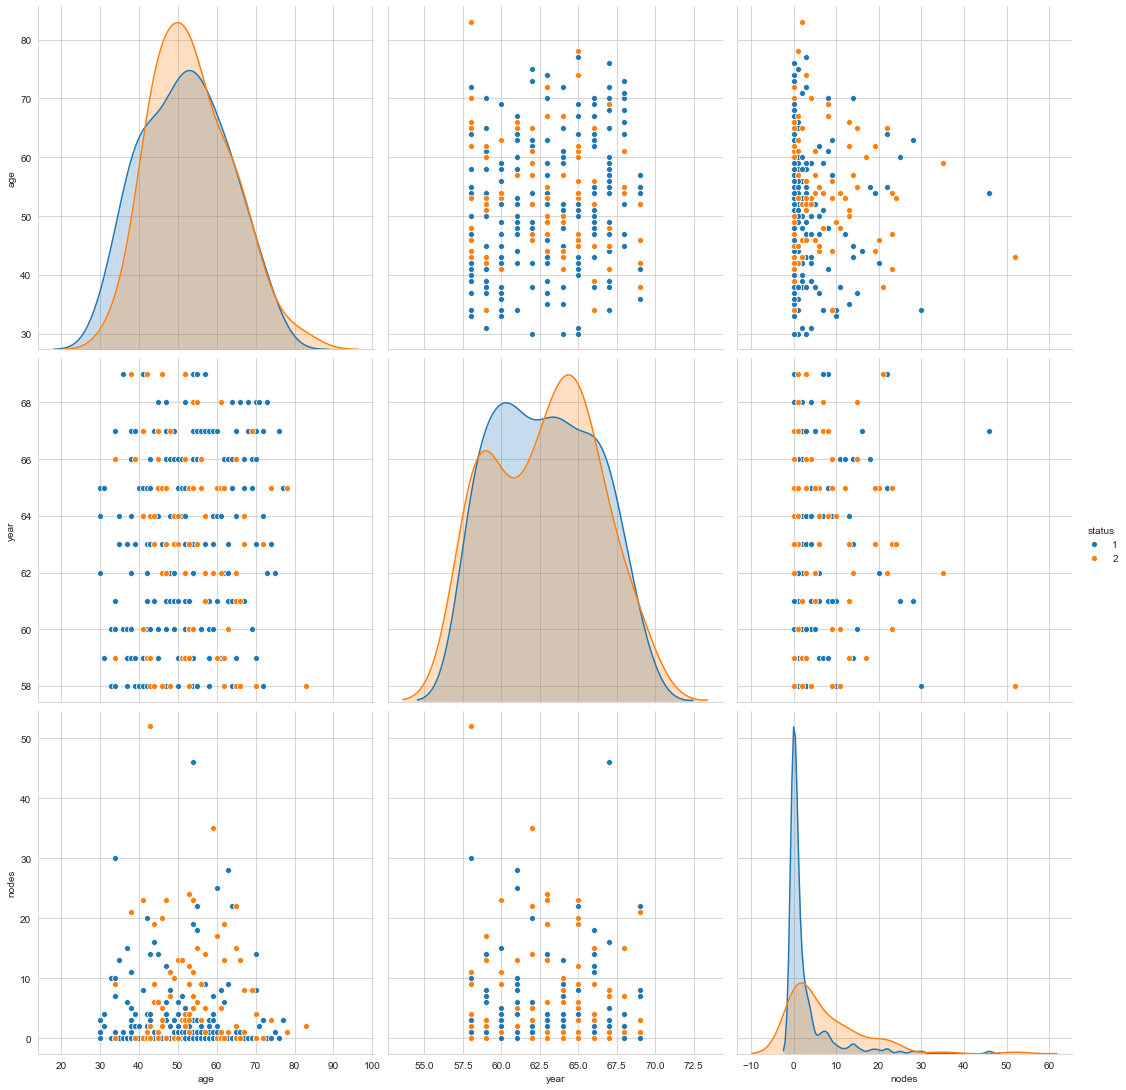

In [66]:
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", height=5);
plt.show()

# Univariate Analysis

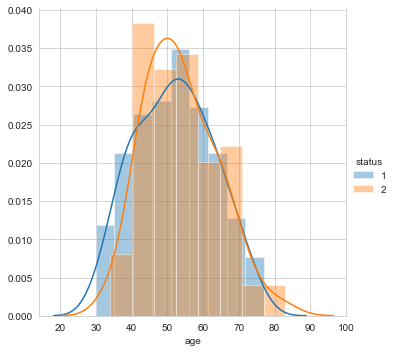

In [67]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

In [68]:
hb.tail(3)

,age,year,nodes,status
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


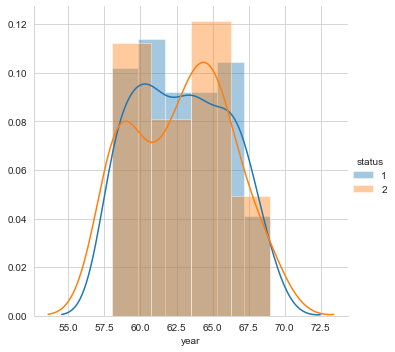

In [69]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

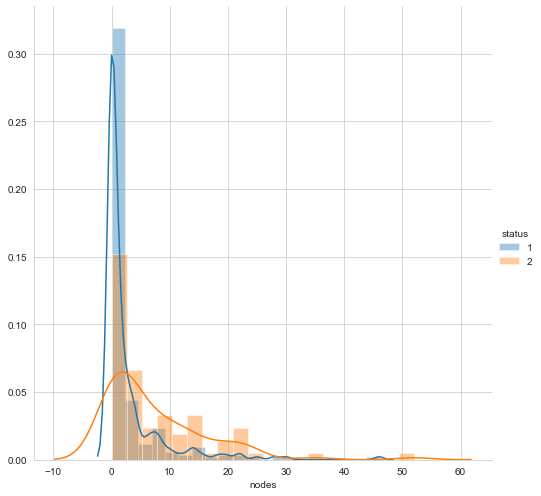

In [87]:
sns.FacetGrid(hb, hue="status", height=7) \
   .map(sns.distplot, "nodes", bins=20) \
   .add_legend();
plt.show();

surv bin_edges [ 0.    0.92  1.84  2.76  3.68  4.6   5.52  6.44  7.36  8.28  9.2  10.12
 11.04 11.96 12.88 13.8  14.72 15.64 16.56 17.48 18.4  19.32 20.24 21.16
 22.08 23.   23.92 24.84 25.76 26.68 27.6  28.52 29.44 30.36 31.28 32.2
 33.12 34.04 34.96 35.88 36.8  37.72 38.64 39.56 40.48 41.4  42.32 43.24
 44.16 45.08 46.  ]



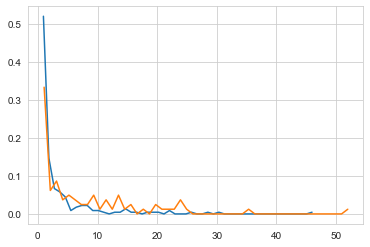

In [90]:
# Survived
surv = hb.loc[ hb.status == 1 ]
counts, bin_edges = np.histogram(surv['nodes'], bins=, 
                                 density = True)
pdf = counts/(sum(counts))
#print('surv pdf', pdf);
print('surv bin_edges', bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:], cdf)

print()

# Died
died = hb.loc[ hb.status == 2 ]
counts, bin_edges = np.histogram(died['nodes'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
#print('died pdf', pdf);
#print('died bin_edges', bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:], cdf)


plt.show();

In [75]:
surv

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
298,73,68,0,1
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1


In [76]:
died

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2
...,...,...,...,...
286,70,58,4,2
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2


In [92]:
surv.nodes.value_counts()

0     117
1      33
2      15
3      13
4      10
7       5
8       5
6       4
14      3
10      2
22      2
5       2
9       2
46      1
11      1
30      1
13      1
15      1
16      1
18      1
19      1
20      1
25      1
28      1
12      1
Name: nodes, dtype: int64

In [93]:
died.nodes.value_counts()

0     19
1      8
3      7
2      5
9      4
5      4
13     4
23     3
4      3
6      3
11     3
19     2
15     2
7      2
8      2
52     1
10     1
35     1
14     1
17     1
20     1
21     1
22     1
24     1
12     1
Name: nodes, dtype: int64